## Exploratory Data Analysis: Movies 


Features:
* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

## Top 10 best and worst movies based on 
- Revenue
- Budget 
- Profit (Rev - Budget)
- ROI (Rev / Budget) only for movies with budget >=10 
- Number of votes 
- Rating (min 10)
- Popularity 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [5]:
pd.read_csv("movies_complete.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [6]:
#import data - preset data type for release_date

df = pd.read_csv("movies_complete.csv", parse_dates=['release_date'])
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


In [14]:
df[['release_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  44657 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 349.3 KB


In [10]:
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df.describe(include='all', datetime_is_numeric=True)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
count,44691.00,44691,20284,44657,42586,4463,44681,8854.00,7385.00,33356,...,42077.00,44691.00,43179.00,43740,41094,44467,42502,44691.00,44691.00,43960
unique,nan,41605,20171,NaN,4044,1691,89,nan,nan,22537,...,nan,nan,nan,43715,1828,44456,42166,nan,nan,17349
top,nan,Cinderella,Based on a true story.,NaN,Drama,The Bowery Boys,en,nan,nan,Metro-Goldwyn-Mayer (MGM),...,nan,nan,nan,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,nan,nan,John Ford
freq,nan,11,7,NaN,4935,29,31755,nan,nan,741,...,nan,nan,nan,3,22189,3,24,nan,nan,66
mean,107186.24,NaN,NaN,1992-04-28 16:30:02.539360640,NaN,NaN,NaN,21.67,68.97,NaN,...,6.00,2.96,97.57,NaN,NaN,NaN,NaN,12.48,10.31,NaN
min,2.00,NaN,NaN,1874-12-09 00:00:00,NaN,NaN,NaN,0.00,0.00,NaN,...,0.00,0.00,1.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN
25%,26033.50,NaN,NaN,1978-08-12 00:00:00,NaN,NaN,NaN,2.00,2.41,NaN,...,5.30,0.40,86.00,NaN,NaN,NaN,NaN,6.00,2.00,NaN
50%,59110.00,NaN,NaN,2001-08-16 00:00:00,NaN,NaN,NaN,8.20,16.87,NaN,...,6.10,1.15,95.00,NaN,NaN,NaN,NaN,10.00,6.00,NaN
75%,154251.00,NaN,NaN,2010-12-10 00:00:00,NaN,NaN,NaN,25.00,67.64,NaN,...,6.80,3.77,107.00,NaN,NaN,NaN,NaN,15.00,12.00,NaN
max,469172.00,NaN,NaN,2017-12-27 00:00:00,NaN,NaN,NaN,380.00,2787.97,NaN,...,10.00,547.49,1256.00,NaN,NaN,NaN,NaN,313.00,435.00,NaN


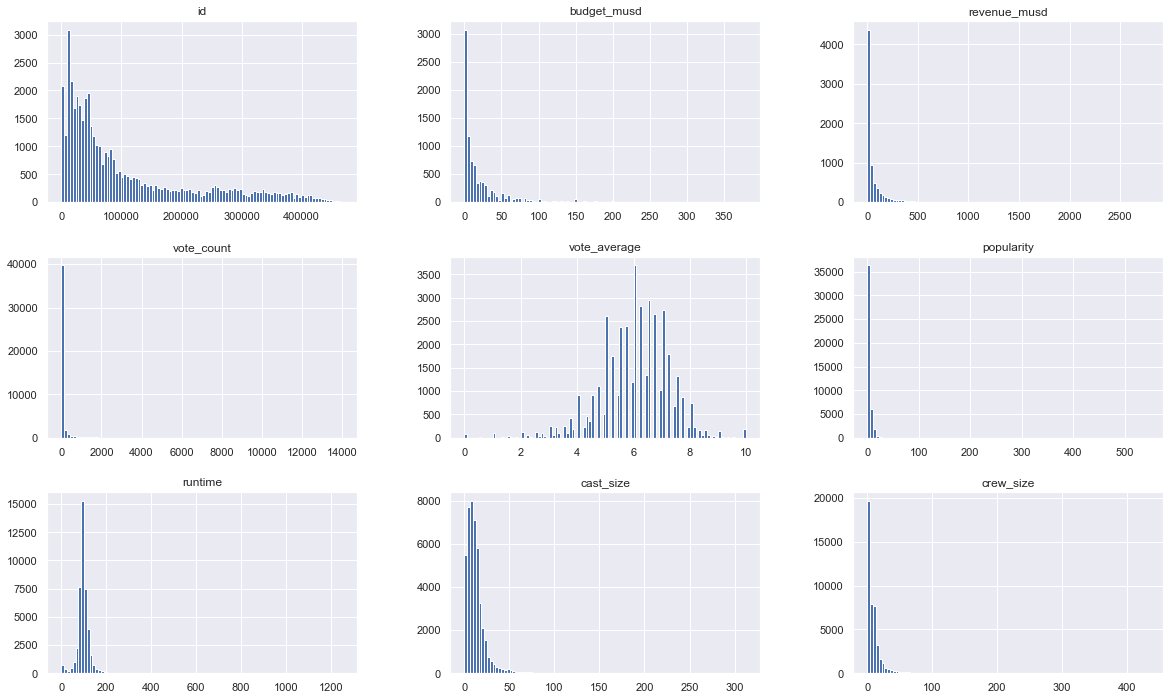

In [15]:
df.hist(figsize=(20,12), bins=100)
plt.show()

In [20]:
df.describe(include='object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [24]:
#Cinderella - true duplicate or not

df.loc[df['title']=='Cinderella'].sort_values(by='release_date')

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,nan,nan,Star-Film|Georges Méliès,...,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,nan,nan,NaN,...,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,nan,nan,Lenfilm,...,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,...,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,nan,nan,NaN,...,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,nan,nan,Walt Disney Television|Citadel Entertainment|S...,...,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,nan,nan,NaN,...,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,nan,nan,GoodTimes Entertainment,...,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,nan,nan,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,...,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
44633,98604,Cinderella,NaN,2012-02-14,Comedy|Romance,NaN,ru,nan,nan,Channel One Russia|Central Partnership,...,4.60,0.80,91.00,"Masha Krapivina - is yet beautiful, and not th...",Pусский,<img src='http://image.tmdb.org/t/p/w185//nvGe...,Kristina Asmus|Nikita Efremov|Artyom Tkachenko...,18,4,Sergey Ivanov


In [25]:
from IPython.display import HTML

In [26]:
#features: Revenue, Budget, Number of Votes, Rating and Popularity
#Profit and ROI to be calculated after adding the features

df.columns.to_list()

['id',
 'title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'crew_size',
 'director']

In [30]:
#incorporate HTML to capture movie posters
df_best = df[['poster_path','title', 'revenue_musd', 'budget_musd', 'vote_count', 'vote_average', 'popularity']].copy()
df_best.head()

,poster_path,title,revenue_musd,budget_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,373.55,30.00,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,262.80,65.00,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,nan,nan,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,81.45,16.00,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,76.58,nan,173.00,5.70,8.39


In [31]:
df_best['profit'] = df['revenue_musd'] - df['budget_musd']
df_best['roi'] = df['revenue_musd'] / df['budget_musd']

df_best.head()

,poster_path,title,revenue_musd,budget_musd,vote_count,vote_average,popularity,profit,roi
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,373.55,30.00,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,262.80,65.00,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,nan,nan,92.00,6.50,11.71,nan,nan
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,81.45,16.00,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,76.58,nan,173.00,5.70,8.39,nan,nan


In [32]:
#rename columns

df_best.columns = ["", "Title", "Revenue", "Budget", "Votes", "Average_Rating", "Popularity", "Profit", "ROI"]

In [33]:
df_best.set_index('Title', inplace=True)

In [34]:
df_best.head()

,,Revenue,Budget,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,373.55,30.00,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,262.80,65.00,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,nan,nan,92.00,6.50,11.71,nan,nan
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,81.45,16.00,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,76.58,nan,173.00,5.70,8.39,nan,nan


In [36]:
df_best.sort_values(by="Average_Rating", ascending=False).head()

,,Revenue,Budget,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,nan,nan,1.00,10.00,0.04,nan,nan
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,nan,nan,1.00,10.00,0.32,nan,nan
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,nan,nan,1.00,10.00,0.04,nan,nan
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,nan,nan,1.00,10.00,1.78,nan,nan
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,nan,nan,2.00,10.00,0.48,nan,nan


In [40]:
#not meaningful since only vote count was 1 or 2
#need to set a parameter
#same goes for ROI

df_best.sort_values(by='ROI', ascending=False).head()

,,Revenue,Budget,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,12.40,0.00,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,8.50,0.00,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,33.58,0.00,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,2.76,0.00,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,115.10,0.00,457.00,5.90,9.23,115.10,1018619.28


In [42]:
#ROI seems very large - also due to nearly 0 budget
#set parameter for budget and vote count

#set budget min to 5

df_best.loc[df_best['Budget'] >= 5].sort_values(by='ROI', ascending=False).head()

,,Revenue,Budget,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,792.97,10.50,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,368.74,5.00,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,775.40,11.00,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,470.65,7.00,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,328.20,5.00,512.00,6.30,7.79,323.20,65.64


In [43]:
#fill missing values for budget and votes by 0

df_best['Budget'].fillna(0, inplace=True)
df_best['Votes'].fillna(0, inplace=True)

In [44]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Revenue         7385 non-null   float64
 2   Budget          44691 non-null  float64
 3   Votes           44691 non-null  float64
 4   Average_Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [59]:
#best_worst function to return Title (index), Movie Poster (image) and selected feature (e.g. Revenue, Budget, etc.) 

def best_worst(n, by, ascending=False, min_bud = 0, min_vote=0):
    
    df2 = df_best.loc[(df_best['Budget'] >= min_bud) & (df_best['Votes'] >= min_vote), ["", by]].sort_values(by=by, ascending=ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

In [70]:
#input top number
#input attribute
#descending order default
#budget default 0
#vote default 0
best_worst(n=5, by='Revenue', ascending=False, min_bud=5, min_vote=20)

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


In [71]:
#if interested in worst, input True
best_worst(n=5, by='Votes')

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


In [75]:
#ROI with budget min of 5
best_worst(n=5, min_bud=5, by='ROI')

,,ROI
Title,,
E.T. the Extra-Terrestrial,,75.52
My Big Fat Greek Wedding,,73.75
Star Wars,,70.49
Jaws,,67.24
Crocodile Dundee,,65.64


In [79]:
#highest rating 
best_worst(n=3, by='Average_Rating', min_vote=10)

,,Average_Rating
Title,,
As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty,,9.50
Planet Earth II,,9.50
The Civil War,,9.20


In [81]:
#most popular
best_worst(by='Popularity', n=5)

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Explore movies - search sci-fi + action with certain actor 

In [95]:
#actor = bruce willis
#genres = sci-fi + action

df.genres[:5]

0     Animation|Comedy|Family
1    Adventure|Fantasy|Family
2              Romance|Comedy
3        Comedy|Drama|Romance
4                      Comedy
Name: genres, dtype: object

In [97]:
#genres are divided by |
#boolean mask - Action and Science Fiction

mask_genres = df.genres.str.contains('Action') & df.genres.str.contains('Science Fiction')
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [98]:
mask_actor = df.cast.str.contains('Bruce Willis')
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [101]:
df.loc[mask_genres & mask_actor, ['poster_path', 'title', 'vote_average']].sort_values(by='vote_average', ascending=False)

,poster_path,title,vote_average
1448,<img src='http://image.tmdb.org/t/p/w185//fPtl...,The Fifth Element,7.30
19218,<img src='http://image.tmdb.org/t/p/w185//sNjL...,Looper,6.60
1786,<img src='http://image.tmdb.org/t/p/w185//fMtO...,Armageddon,6.50
14135,<img src='http://image.tmdb.org/t/p/w185//v3Z0...,Surrogates,5.90
20333,<img src='http://image.tmdb.org/t/p/w185//3rWI...,G.I. Joe: Retaliation,5.40
27619,<img src='http://image.tmdb.org/t/p/w185//nPqN...,Vice,4.10


In [102]:
bruce =  df.loc[mask_genres & mask_actor, ['poster_path', 'title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)

In [103]:
HTML(bruce.to_html(escape=False))

,poster_path,title,vote_average
1448,,The Fifth Element,7.30
19218,,Looper,6.60
1786,,Armageddon,6.50
14135,,Surrogates,5.90
20333,,G.I. Joe: Retaliation,5.40
27619,,Vice,4.10


## Explore movies - cast Uma Thurman & director Quentin Tarantino (low runtime)



In [ ]:
mask_cast = df.cast.str.contains('Uma Thurman')
mask_director = df.director.str.contains('Quentin Tarantino')

In [107]:
df.loc[mask_cast & mask_director, ["poster_path", "title", "director", "runtime"]].sort_values(by='runtime', ascending=True).head(10)

,poster_path,title,director,runtime
6667,<img src='http://image.tmdb.org/t/p/w185//v7Ta...,Kill Bill: Vol. 1,Quentin Tarantino,111.00
7208,<img src='http://image.tmdb.org/t/p/w185//2yhg...,Kill Bill: Vol. 2,Quentin Tarantino,136.00
291,<img src='http://image.tmdb.org/t/p/w185//d5iI...,Pulp Fiction,Quentin Tarantino,154.00


In [108]:
uma_quentin = df.loc[mask_cast & mask_director, ["poster_path", "title", "director", "runtime"]].sort_values(by='runtime', ascending=True)


In [109]:
HTML(uma_quentin.to_html(escape=False))

,poster_path,title,director,runtime
6667,,Kill Bill: Vol. 1,Quentin Tarantino,111.00
7208,,Kill Bill: Vol. 2,Quentin Tarantino,136.00
291,,Pulp Fiction,Quentin Tarantino,154.00


## Explore most successful pixar studio movies between 2010 and 2015 (by revenue)

In [110]:
df.columns.to_list()

['id',
 'title',
 'tagline',
 'release_date',
 'genres',
 'belongs_to_collection',
 'original_language',
 'budget_musd',
 'revenue_musd',
 'production_companies',
 'production_countries',
 'vote_count',
 'vote_average',
 'popularity',
 'runtime',
 'overview',
 'spoken_languages',
 'poster_path',
 'cast',
 'cast_size',
 'crew_size',
 'director']

In [112]:
df['release_date'][:5]

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-02-10
Name: release_date, dtype: datetime64[ns]

In [122]:
df_year = (df['release_date']>='2010-01-01') & (df['release_date']<='2015-12-31')
df_year[:5]

0    False
1    False
2    False
3    False
4    False
Name: release_date, dtype: bool

In [117]:
df['production_companies'][:5]

0                              Pixar Animation Studios
1    TriStar Pictures|Teitler Film|Interscope Commu...
2                          Warner Bros.|Lancaster Gate
3               Twentieth Century Fox Film Corporation
4            Sandollar Productions|Touchstone Pictures
Name: production_companies, dtype: object

In [123]:
df_pixar = df.production_companies.str.contains('Pixar')
df_pixar[:5]

0     True
1    False
2    False
3    False
4    False
Name: production_companies, dtype: object

In [124]:
df.loc[df_year & df_pixar, ["poster_path", "title", "revenue_musd", "release_date"]].sort_values(by='revenue_musd', ascending=False).head(5)

,poster_path,title,revenue_musd,release_date
15236,<img src='http://image.tmdb.org/t/p/w185//amY0...,Toy Story 3,1066.97,2010-06-16
29957,<img src='http://image.tmdb.org/t/p/w185//lRHE...,Inside Out,857.61,2015-06-09
20888,<img src='http://image.tmdb.org/t/p/w185//tyHH...,Monsters University,743.56,2013-06-20
17220,<img src='http://image.tmdb.org/t/p/w185//okIz...,Cars 2,559.85,2011-06-11
18900,<img src='http://image.tmdb.org/t/p/w185//8l0p...,Brave,538.98,2012-06-21


In [125]:
pixar = df.loc[df_year & df_pixar, ["poster_path", "title", "revenue_musd", "release_date"]].sort_values(by='revenue_musd', ascending=False)

In [126]:
HTML(pixar.head().to_html(escape=False))

,poster_path,title,revenue_musd,release_date
15236,,Toy Story 3,1066.97,2010-06-16
29957,,Inside Out,857.61,2015-06-09
20888,,Monsters University,743.56,2013-06-20
17220,,Cars 2,559.85,2011-06-11
18900,,Brave,538.98,2012-06-21


In [127]:
## Explore Movie - action or thriller genres, original language English, min rating 7.5 (sort by = most recent)

mask_genres1 = df.genres.str.contains('Action') | df.genres.str.contains('Thriller')
mask_genres1.head()

0    False
1    False
2    False
3    False
4    False
Name: genres, dtype: bool

In [128]:
df.original_language.value_counts()

en    31755
fr     2400
it     1471
ja     1339
de     1064
      ...  
fy        1
cy        1
rw        1
uz        1
la        1
Name: original_language, Length: 89, dtype: int64

In [129]:
mask_en = df.original_language == 'en'
mask_en.head()

0    True
1    True
2    True
3    True
4    True
Name: original_language, dtype: bool

In [130]:
mask_rating = df.vote_average >= 7.5
mask_rating.head()

0     True
1    False
2    False
3    False
4    False
Name: vote_average, dtype: bool

In [132]:
#set min vote count since certain movies have only 1
mask_count = df.vote_count >= 10

In [134]:
df.loc[mask_genres1 & mask_en & mask_rating &mask_count, ["title", "poster_path", "release_date", "original_language", "vote_average"]].sort_values(by='release_date', ascending=False).head()

,title,poster_path,release_date,original_language,vote_average
44490,Descendants 2,<img src='http://image.tmdb.org/t/p/w185//8BNy...,2017-07-21,en,7.50
43941,Dunkirk,<img src='http://image.tmdb.org/t/p/w185//ebSn...,2017-07-19,en,7.50
42624,The Book of Henry,<img src='http://image.tmdb.org/t/p/w185//suLF...,2017-06-16,en,7.60
26273,Guardians of the Galaxy Vol. 2,<img src='http://image.tmdb.org/t/p/w185//y4MB...,2017-04-19,en,7.60
41506,Logan,<img src='http://image.tmdb.org/t/p/w185//fnbj...,2017-02-28,en,7.60


In [135]:
movie_select = df.loc[mask_genres1 & mask_en & mask_rating &mask_count, ["title", "poster_path", "release_date", "original_language", "vote_average"]].sort_values(by='release_date', ascending=False)

In [136]:
HTML(movie_select.head(5).to_html(escape=False))

,title,poster_path,release_date,original_language,vote_average
44490,Descendants 2,,2017-07-21,en,7.50
43941,Dunkirk,,2017-07-19,en,7.50
42624,The Book of Henry,,2017-06-16,en,7.60
26273,Guardians of the Galaxy Vol. 2,,2017-04-19,en,7.60
41506,Logan,,2017-02-28,en,7.60


## Most common words found in movie taglines

In [137]:
from wordcloud import WordCloud

In [140]:
tagline = df['tagline'].dropna()
words = " ".join(tagline)

In [146]:
body = WordCloud(height=2000, width=4000, background_color='white', max_words=200, colormap='plasma').generate(words)

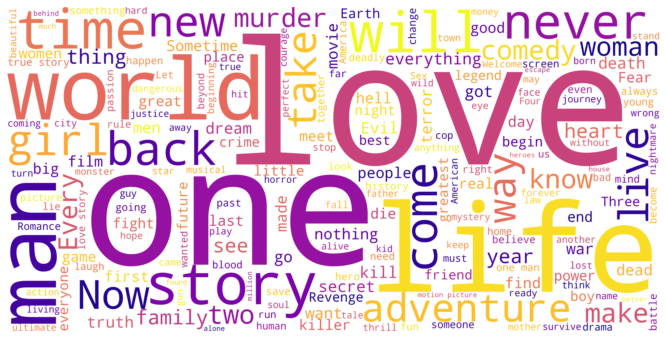

In [147]:
plt.figure(figsize=(18,6))
plt.imshow(body, interpolation='bilinear')
plt.axis('off')
plt.show()

In [148]:
#use image to change shape of the wordcloud 
from PIL import Image

In [165]:
mask = np.array(Image.open('blueheart.jpg'))

In [166]:
body = WordCloud(height=2000, width=4000, background_color='white', max_words=200, colormap='plasma', mask=mask).generate(words)

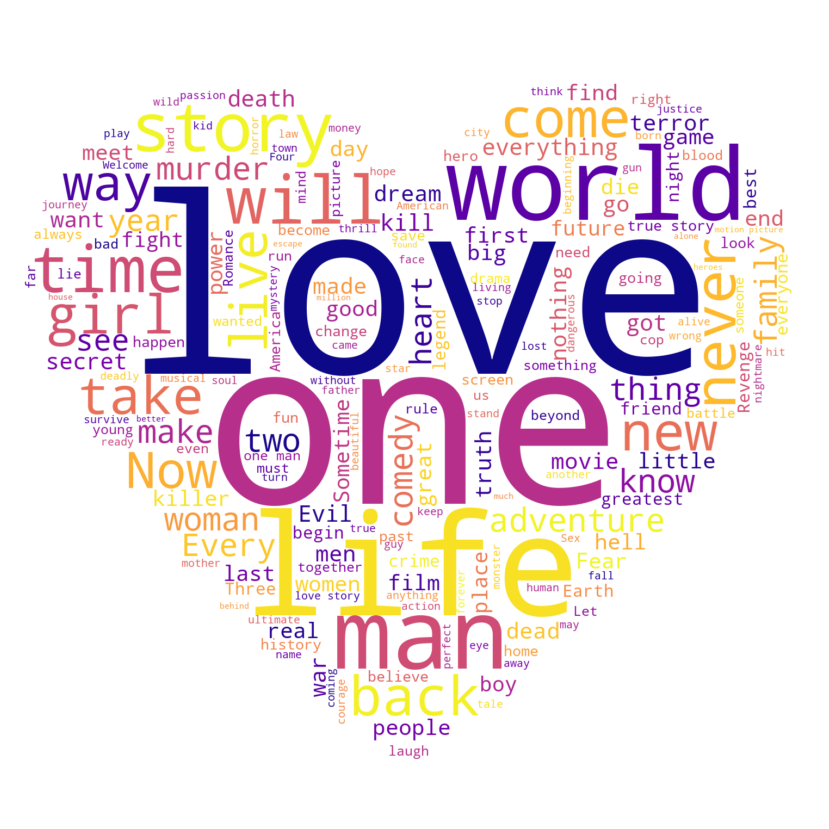

In [169]:
plt.figure(figsize=(15,15))
plt.imshow(body, interpolation='bilinear')
plt.axis('off')
plt.show()